<a href="https://colab.research.google.com/github/leduynguyen/soundClassification/blob/master/EngineDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Video link: https://www.youtube.com/watch?time_continue=39&v=_oqjmbfLg0o
* Download audio from video youtube: https://y2mate.com
* Convert to wav from mp3: https://www.online-convert.com/
* Sample audio: https://drive.google.com/open?id=1S6IDTwg5Z4yA1HZtPUXyzt6QksukchDZ

* Upload sample audio data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ideal_ford_5second.wav to ideal_ford_5second.wav


* Install librosa and depedency

In [0]:
%%capture
!pip install librosa

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

* Play audio data

In [34]:
Audio("ideal_ford_5second.wav")

* Load and Display audio in time series

Text(0.5,1,'Stereo')

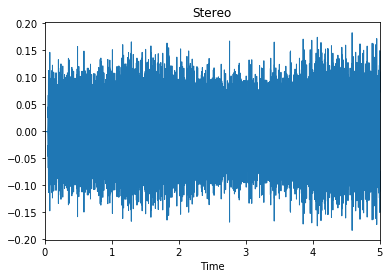

In [40]:
y, sr = librosa.load("ideal_ford_5second.wav")

* Compute the Short-time Fourier transform (STFT)

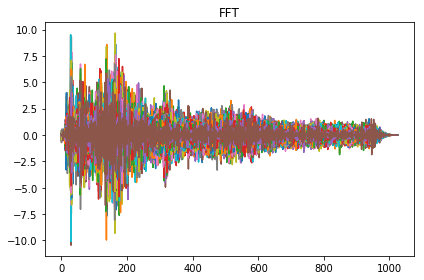

In [49]:
D = librosa.core.spectrum.stft(y)
plt.figure()
plt.plot(D)
plt.title('FFT')
plt.tight_layout()
plt.show()

* Compute Harmonic salience

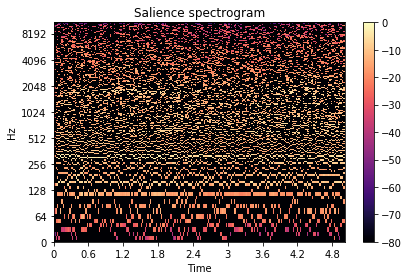

In [43]:
S = np.abs(librosa.stft(y))
freqs = librosa.core.fft_frequencies(sr)
harms = [1, 2, 3, 4]
weights = [1.0, 0.5, 0.33, 0.25]
S_sal = librosa.salience(S, freqs, harms, weights, fill_value=0)

plt.figure()
librosa.display.specshow(librosa.amplitude_to_db(S_sal, ref=np.max), sr=sr, y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Salience spectrogram')
plt.tight_layout()
plt.show()

* Compute & Display Mel-scaled spectrogram

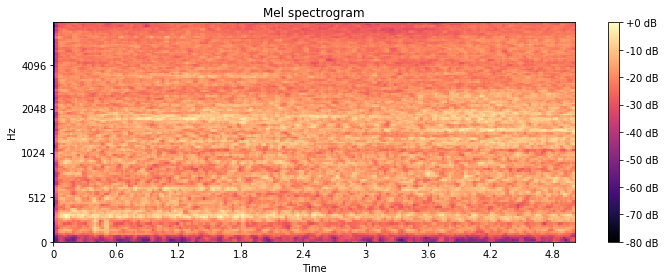

In [30]:
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='mel',fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

* Compute & Display the Mel-frequency cepstral coefficients (MFCCs)

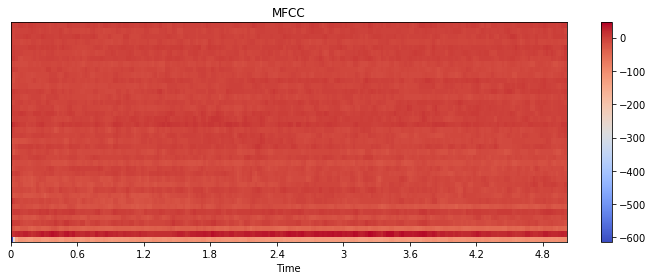

In [36]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

* Compute a chromagram

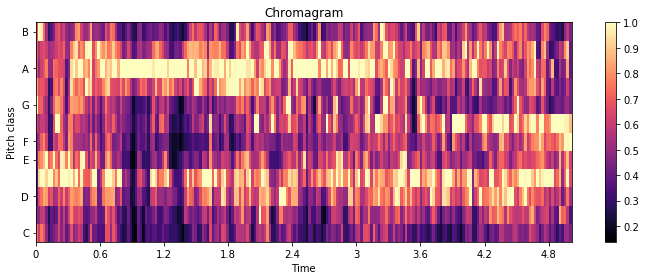

In [37]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

* Onset detection

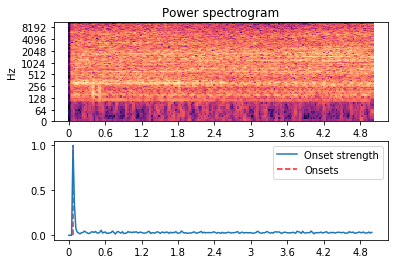

In [42]:
# Detect
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)

# pre-computed onset envelope
o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

# Display
D = np.abs(librosa.stft(y))
plt.figure()
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram')

plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)
plt.show()